In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("data/merged_data.csv")

In [50]:
df.head(20)

,year,population,gdp,co2,solar_generation,wind_generation,hydro_generation,other_generation
0,1965,195653775.0,4.156140e+12,3399.547,NaN,NaN,198.97409,13.332232
1,1966,198265397.0,4.428300e+12,3571.421,NaN,NaN,199.93690,14.062007
2,1967,200699913.0,4.538980e+12,3705.461,NaN,NaN,227.22081,14.073571
3,1968,203011021.0,4.754930e+12,3840.919,NaN,NaN,228.15471,15.546045
4,1969,205300032.0,4.903770e+12,4035.145,NaN,NaN,256.02853,16.227060
5,1970,207796339.0,4.912640e+12,4339.686,NaN,NaN,253.49237,16.235903
6,1971,210426424.0,5.065680e+12,4365.465,NaN,NaN,272.25400,16.584414
7,1972,212842574.0,5.334300e+12,4573.015,NaN,NaN,278.71597,18.672980
8,1973,215006548.0,5.637200e+12,4785.434,NaN,NaN,278.21270,19.989693
9,1974,217076474.0,5.621370e+12,4621.419,NaN,NaN,307.28464,20.404264


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              59 non-null     int64  
 1   population        59 non-null     float64
 2   gdp               58 non-null     float64
 3   co2               59 non-null     float64
 4   solar_generation  41 non-null     float64
 5   wind_generation   41 non-null     float64
 6   hydro_generation  59 non-null     float64
 7   other_generation  59 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.8 KB


**Imputing Missing Values**

There are missing values in gdp, solar_generation and wind_generation that we need to account for.
We will start with solar_generation and wind_generation by assuming the missing values are placeholders for 0. This makes sense because in 1983 when the data becomes not missing, the values are very small. Moreover, we will combine all four clean energy generation sources into a "total_generation" feature, because we do not care about the source of the clean energy generation.

In [52]:
df["solar_generation"] = df["solar_generation"].fillna(0)
df["wind_generation"] = df["wind_generation"].fillna(0)
df["total_generation"] = df["solar_generation"] + df["wind_generation"] + df["hydro_generation"] + df["other_generation"]

In [53]:
df.head()

,year,population,gdp,co2,solar_generation,wind_generation,hydro_generation,other_generation,total_generation
0,1965,195653775.0,4.156140e+12,3399.547,0.0,0.0,198.97409,13.332232,212.306322
1,1966,198265397.0,4.428300e+12,3571.421,0.0,0.0,199.93690,14.062007,213.998907
2,1967,200699913.0,4.538980e+12,3705.461,0.0,0.0,227.22081,14.073571,241.294381
3,1968,203011021.0,4.754930e+12,3840.919,0.0,0.0,228.15471,15.546045,243.700755
4,1969,205300032.0,4.903770e+12,4035.145,0.0,0.0,256.02853,16.227060,272.255590


Next, we will fix the missing gdp value.

In [54]:
df[df["gdp"].isna()]

,year,population,gdp,co2,solar_generation,wind_generation,hydro_generation,other_generation,total_generation
58,2023,343477332.0,NaN,4911.391,240.52525,429.5307,236.32129,67.2901,973.66734


Since the latest value for gdp is missing only, we can assume it is missing because the dataset did not collect the data yet. We will impute it by linear extrapolation, since the increase in gdp between 2021 and 2022 should be pretty similar to the increase in gdp between 2022 and 2023.

In [55]:
gdp_2021 = df.loc[56, "gdp"]
gdp_2022 = df.loc[57, "gdp"]

print(f"gdp 2021: {gdp_2021} \ngdp 2022: {gdp_2022}")

gdp 2021: 19099400000000.0 
gdp 2022: 19493200000000.0


In [56]:
extrapolated_gdp_2023 = (gdp_2022 - gdp_2021) + gdp_2022
df.loc[58, "gdp"] = extrapolated_gdp_2023
print(f"gdp 2023: {df.loc[58, 'gdp']}")

gdp 2023: 19887000000000.0


**Checking For Outliers**

Text(0.5, 1.0, 'co2')

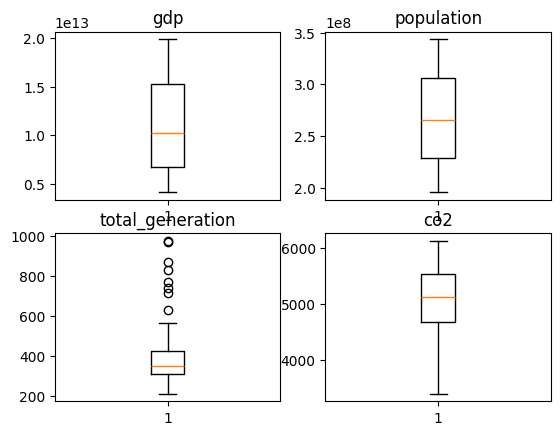

In [67]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].boxplot(df["gdp"])
axes[0, 0].set_title("gdp")
axes[0, 1].boxplot(df["population"])
axes[0, 1].set_title("population")
axes[1, 0].boxplot(df["total_generation"])
axes[1, 0].set_title("total_generation")
axes[1, 1].boxplot(df["co2"])
axes[1, 1].set_title("co2")


There are outliers in total_generation. We will handle it using IQR method

In [74]:
Q1 = df["total_generation"].quantile(0.25)
Q3 = df["total_generation"].quantile(0.75)
IQR = Q3 - Q1

print(f"num of outliers: {len(df[df['total_generation'] > Q3])}")

num of outliers: 15


In [73]:
df["total_generation"] = df["total_generation"].clip(Q1, Q3)

Double checking that there are no outliers now

Text(0.5, 1.0, 'co2')

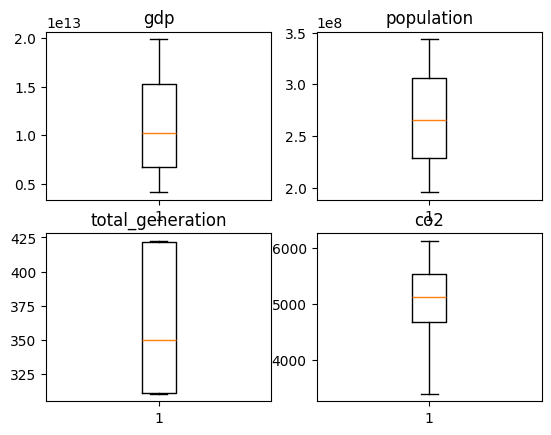

In [76]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].boxplot(df["gdp"])
axes[0, 0].set_title("gdp")
axes[0, 1].boxplot(df["population"])
axes[0, 1].set_title("population")
axes[1, 0].boxplot(df["total_generation"])
axes[1, 0].set_title("total_generation")
axes[1, 1].boxplot(df["co2"])
axes[1, 1].set_title("co2")


**Exporting the cleaned data with only the required features**

In [78]:
df_cleaned = df[["gdp", "population", "total_generation", "co2"]]

In [79]:
df_cleaned.to_csv("data/cleaned_data.csv", index = False)